In [1]:
from datetime import datetime, timedelta
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from model import Model, Household
from det_rh_opt import compute_controls as det_rh_controller
from stochastic_rh_opt import compute_controls as stoc_rh_controller

In [2]:
the_model = Model.load("vic_household_january.json")

In [3]:
sim = Household(R_0=0.5)

In [4]:
start_time = datetime.strptime("00:00", "%H:%M")
duration = timedelta(hours=24)
end_time = start_time + duration
resolution = timedelta(minutes=30)
T = int(np.ceil(duration / resolution))

In [5]:
price = 0.25278

In [6]:
hours = mdates.HourLocator()
minutes = mdates.MinuteLocator()

## Deterministic Rolling Horizon Control

In [7]:
np.random.seed(1337)
t = start_time
sim.init(the_model, t, resolution)

time_points = []
drh_R = []
drh_D = []
drh_h = []
drh_C = []

In [8]:
drh_runtime = []
for t_k in range(T):
    time_points += [t]
    drh_R += [sim.R]
    drh_D += [sim.D]
    drh_h += [sim.h]
    drh_C += [sim.C]
    t_s = time.time()
    x_gb, x_sb, x_sd, x_bd, x_gd = det_rh_controller(the_model, drh_R[-1], drh_D[-1], drh_h[-1], T, t, resolution, price)
    drh_runtime += [time.time() - t_s]
    sim.tick(the_model, t, resolution, price, x_gb, x_sb, x_sd, x_bd, x_gd)
    t += resolution

Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal


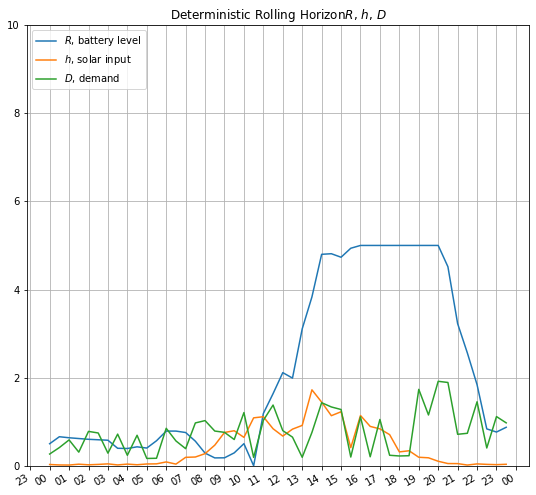

In [9]:
fig, ax = plt.subplots(figsize=(9,9))

ax.set_title("Deterministic Rolling Horizon$R$, $h$, $D$")
ax.set_ylim(0.0, 10.0)
ax.grid(True)

ax.plot(time_points, drh_R, label='$R$, battery level')
ax.plot(time_points, drh_h, label='$h$, solar input')
ax.plot(time_points, drh_D, label='$D$, demand')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

ax.legend(loc="upper left")

fig.autofmt_xdate()
plt.show()

## Stochastic Rolling Horizon Control

In [10]:
np.random.seed(1337)
t = start_time
sim.init(the_model, t, resolution)

time_points = []
srh_R = []
srh_D = []
srh_h = []
srh_C = []

In [11]:
srh_runtime = []
for t_k in range(T):
    time_points += [t]
    srh_R += [sim.R]
    srh_D += [sim.D]
    srh_h += [sim.h]
    srh_C += [sim.C]
    t_s = time.time()
    x_gb, x_sb, x_sd, x_bd, x_gd = stoc_rh_controller(the_model, srh_R[-1], srh_D[-1], srh_h[-1], 20, T, t, resolution, price)
    srh_runtime += [time.time() - t_s]
    sim.tick(the_model, t, resolution, price, x_gb, x_sb, x_sd, x_bd, x_gd)
    t += resolution

Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal
Status optimal


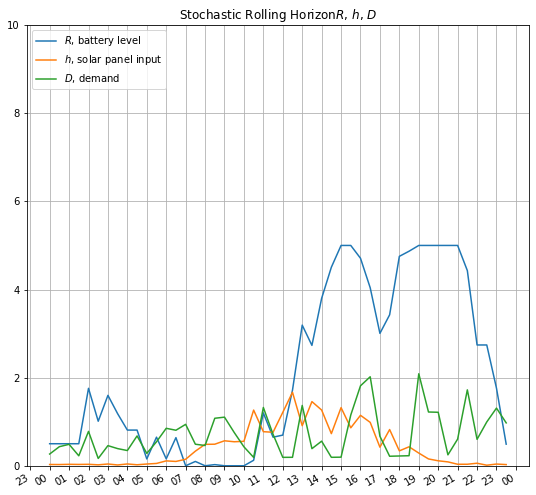

In [12]:
fig, ax = plt.subplots(figsize=(9,9))

ax.set_title("Stochastic Rolling Horizon$R$, $h$, $D$")
ax.set_ylim(0.0, 10.0)
ax.grid(True)

ax.plot(time_points, srh_R, label='$R$, battery level')
ax.plot(time_points, srh_h, label='$h$, solar panel input')
ax.plot(time_points, srh_D, label='$D$, demand')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))


fig.autofmt_xdate()
ax.legend(loc="upper left")
plt.show()

## Comparison

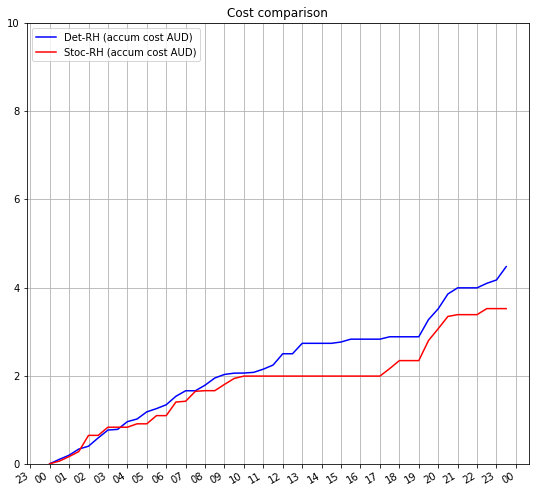

Deterministic Rolling Horizon: Total runtime 3.552879571914673 secs, avg. runtime 0.07401832441488902 secs
Stochastic Rolling Horizon: Total runtime 79.84177613258362 secs, avg. runtime 1.6633703360954921 secs


In [13]:
fig, ax = plt.subplots(figsize=(9,9))

ax.set_title("Cost comparison")
ax.set_ylim(0.0, 10.0)
ax.grid(True)


ax.plot(time_points, drh_C, color='blue', label='Det-RH (accum cost AUD)')
ax.plot(time_points, srh_C, color='red', label='Stoc-RH (accum cost AUD)')

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
ax.legend(loc="upper left")

fig.autofmt_xdate()
plt.show()

print("Deterministic Rolling Horizon: Total runtime", np.sum(drh_runtime), "secs, avg. runtime", np.mean(drh_runtime), "secs")
print("Stochastic Rolling Horizon: Total runtime", np.sum(srh_runtime), "secs, avg. runtime", np.mean(srh_runtime), "secs")